a. Import the required Libraries

In [ ]:
# Import the pandas library for handling datasets (tables, CSV, Excel, etc.)
import pandas as pd

# Import numpy for numerical calculations (arrays, math functions, etc.)
import numpy as np

# Import matplotlib for creating plots and graphs
import matplotlib.pyplot as plt

# Import seaborn for advanced visualizations (built on top of matplotlib)
import seaborn as sns

# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression model from sklearn (used to perform regression analysis)
from sklearn.linear_model import LinearRegression

# Import metrics to evaluate model performance (R², MSE, MAE, etc.)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Import SimpleImputer for handling missing data (fill missing values with mean, median, etc.)
from sklearn.impute import SimpleImputer

# Import warnings to control warning messages
import warnings
# Ignore warnings so they don’t appear in output
warnings.filterwarnings('ignore')

# Set a visualization style for matplotlib (makes plots look nicer)
plt.style.use('seaborn-v0_8')

# Set a color palette for seaborn plots (husl gives different distinct colors)
sns.set_palette("husl")


b. Reading our Dataset.

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
# (replace the path with the actual file location in your system/Colab)
df = pd.read_csv('/content/DS 332 Lab Final Dataset - DS 332 Lab Final Dataset.csv')

# Show the total number of rows and columns in the dataset
print("Dataset Shape:", df.shape)

# Display the first 5 rows (helps to quickly check how the dataset looks)
print("\nFirst 5 rows:")
print(df.head())

# Show a concise summary of the dataset
# (column names, non-null counts, data types, memory usage, etc.)
print("\nDataset Info:")
print(df.info())

# Check how many missing (NaN) values each column has
# (important step before data cleaning or preprocessing)
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Shape: (400, 10)

First 5 rows:
   Serial No. Degree  GRE Score  TOEFL Score  University Rating  SOP  LOR  \
0           1   B.Sc      337.0        118.0                4.0  4.5  4.5   
1           2   B.Sc      324.0        107.0                4.0  4.0  4.5   
2           3   B.Sc      316.0        104.0                3.0  3.0  3.5   
3           4   B.Sc      322.0        110.0                3.0  3.5  2.5   
4           5   B.Sc      314.0        103.0                2.0  2.0  3.0   

   CGPA  Research  Chance of Admit  
0  9.65       1.0             0.92  
1  8.87       1.0             0.76  
2  8.00       1.0             0.72  
3  8.67       NaN             0.80  
4  8.21       0.0              NaN  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   Degree

c. Visualizing the Data using HeatMap

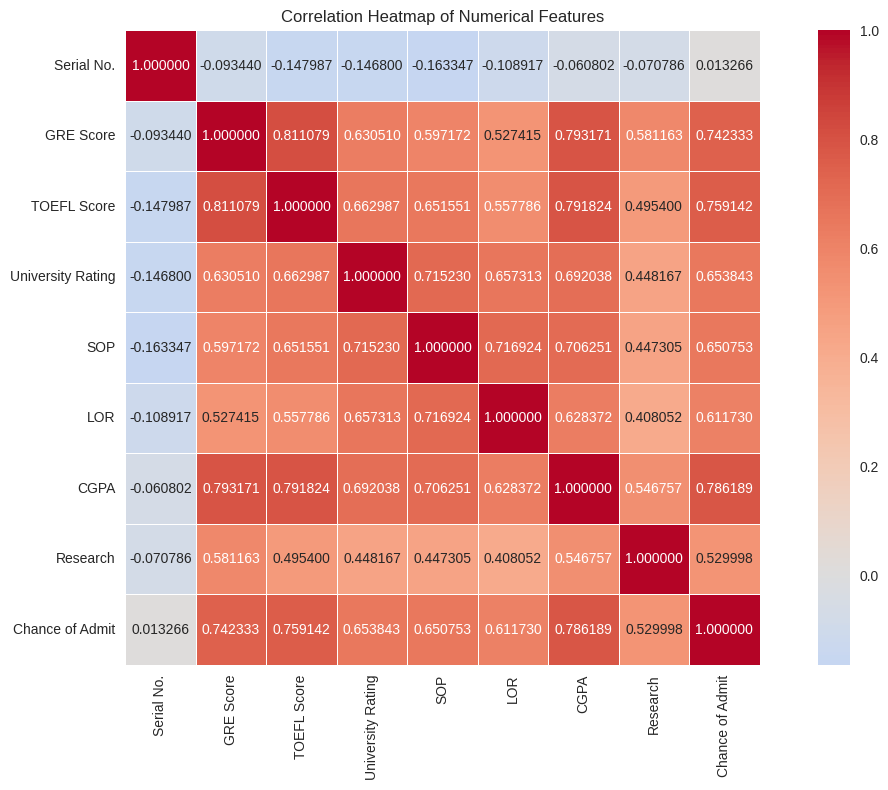

In [ ]:
# Select only the numeric (number-based) Columns from the dataset
df_numeric = df.select_dtypes(include=[np.number])

# Fill missing values in numeric columns with the column mean
# (so visualization/calculations don’t break due to NaN values)
df_filled = df_numeric.fillna(df_numeric.mean())

# Set the figure size for the heatmap (7 inches wide, 5 inches tall)
plt.figure(figsize=(12,8))

# Create a correlation matrix (shows relationship strength between numeric features)
correlation_matrix = df_filled.corr()

# Plot the heatmap using seaborn
# annot=True -> show correlation values inside cells
# cmap='coolwarm' -> color scale from blue (negative) to red (positive)
# center=0 -> make 0 the midpoint of the color scale
# square=True -> make each cell square-shaped
# fmt='.2f' -> show values with 2 decimal places
# linewidths=0.5 -> thin lines between squares for clarity
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.6f', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Heatmap of Numerical Features')

# Adjust layout so labels/title don’t overlap
plt.tight_layout()

# Show the heatmap
plt.show()


d. Check the correlations in the dataset

Correlation with 'Chance of Admit':
Chance of Admit      1.000000
CGPA                 0.786189
TOEFL Score          0.759142
GRE Score            0.742333
University Rating    0.653843
SOP                  0.650753
LOR                  0.611730
Research             0.529998
Serial No.           0.013266
Name: Chance of Admit, dtype: float64


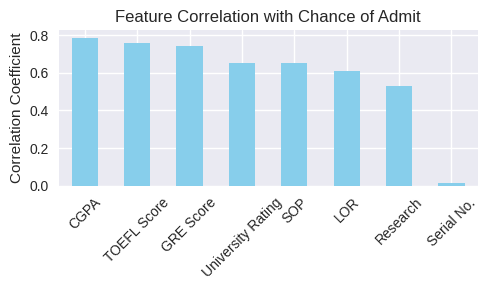

In [ ]:
# Check how each feature is correlated with the target variable "Chance of Admit"
# (Higher correlation = stronger relationship with target)
target_corr = correlation_matrix['Chance of Admit'].sort_values(ascending=False)

# Print correlation values sorted from highest to lowest
print("Correlation with 'Chance of Admit':")
print(target_corr)

# ---------------- Visualization ----------------

# Set figure size for the bar chart
plt.figure(figsize=(5,3))

# Drop the target itself (since correlation with itself is always 1)
# and create a bar plot of correlations with other features
target_corr.drop('Chance of Admit').plot(kind='bar', color='skyblue')

# Add title and axis labels
plt.title('Feature Correlation with Chance of Admit')
plt.ylabel('Correlation Coefficient')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout so nothing overlaps
plt.tight_layout()

# Show the bar chart
plt.show()


e. Make features

In [ ]:
# Create a SimpleImputer object that will replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Select the input features (independent variables) that are most related to the target
# These features were chosen based on the correlation analysis
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
X = df[features]                     # Feature matrix (inputs)
y = df['Chance of Admit']            # Target variable (output)

# Apply imputer to the features (X) → replaces NaN values with column means
X_imputed = imputer.fit_transform(X)

# Apply imputer to the target (y) → replaces NaN values with mean of the column
# y is converted to 2D array with reshape, then back to 1D with ravel()
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Convert the imputed features back into a DataFrame for easy handling
# (since fit_transform() returns a NumPy array without column names)
X_processed = pd.DataFrame(X_imputed, columns=features)

# Display the processed DataFrame (with missing values handled)
X_processed



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1.000000
1,324.0,107.0,4.0,4.0,4.5,8.87,1.000000
2,316.0,104.0,3.0,3.0,3.5,8.00,1.000000
3,322.0,110.0,3.0,3.5,2.5,8.67,0.549738
4,314.0,103.0,2.0,2.0,3.0,8.21,0.000000
...,...,...,...,...,...,...,...
395,324.0,110.0,3.0,3.5,3.5,9.04,1.000000
396,325.0,107.0,3.0,3.0,3.5,9.11,1.000000
397,330.0,116.0,4.0,5.0,4.5,9.45,1.000000
398,312.0,103.0,3.0,3.5,4.0,8.78,0.000000


f. Train test splitting

In [ ]:
# Split the dataset into training and testing sets
# X_processed → features (independent variables)
# y_imputed   → target (dependent variable)
# test_size=0.2 → 20% of the data will be used for testing, 80% for training
# random_state=42 → ensures reproducibility (same split every time you run the code)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_imputed, test_size=0.2, random_state=42
)

# Print the shapes (rows, columns) of training and testing sets
# Helps to confirm that data was split correctly
print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training set shape: X_train (320, 7), y_train (320,)
Testing set shape: X_test (80, 7), y_test (80,)


g. Generating the model and train regression model

In [ ]:
# Create a Linear Regression model object
# (This is the machine learning algorithm we are using)
model = LinearRegression()

# Train (fit) the model on the training data
# The model will learn the relationship between features (X_train) and target (y_train)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set (unseen data)
y_pred = model.predict(X_test)

# Display the predicted values of the target variable
y_pred


array([0.66448198, 0.72045566, 0.87619476, 0.81171167, 0.58790799,
       0.91474626, 0.5321383 , 0.55734084, 0.65242345, 0.82455284,
       0.73454434, 0.88875889, 0.59485394, 0.8719188 , 0.70338579,
       0.69915836, 0.66265693, 0.50701006, 0.70132454, 0.95330149,
       0.58967749, 0.70253688, 0.69612737, 0.53064011, 0.93129215,
       0.78137709, 0.70864455, 0.56892408, 0.67298857, 0.78371632,
       0.79426144, 0.93450966, 0.66563816, 0.63088812, 0.66895042,
       0.66667377, 0.72181738, 0.65883345, 0.62420339, 0.87447072,
       0.72951054, 0.63860585, 0.77481083, 0.86727544, 0.84189011,
       0.8258265 , 0.91642633, 0.65197425, 0.85722157, 0.84608042,
       0.83179609, 0.73353977, 0.78668688, 0.93985687, 0.60191966,
       0.63984335, 0.6960525 , 0.82981667, 0.63683501, 0.84938411,
       0.66299734, 0.64692597, 0.72360164, 0.53062335, 0.64839012,
       0.70698819, 0.62599146, 0.84216107, 0.84569973, 0.7895897 ,
       0.72897108, 0.80303575, 0.82166894, 0.7852482 , 0.52561

h. Check Coefficients, Intercept, R-Squared Value

Model Coefficients:
             Feature  Coefficient
5               CGPA     0.070193
6           Research     0.017456
4                LOR     0.014321
3                SOP     0.010320
2  University Rating     0.006364
1        TOEFL Score     0.004840
0          GRE Score     0.001883

Intercept: -1.1058
R-squared Score: 0.6351


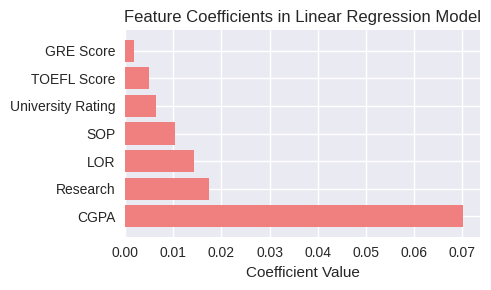

In [ ]:
# Create a DataFrame showing each feature and its corresponding coefficient
# Coefficients indicate how much the target changes with a one-unit change in the feature
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)  # Sort by coefficient value

# Get the intercept of the model
# This is the predicted value of the target when all features are 0
intercept = model.intercept_

# Calculate R-squared score to evaluate model performance
# R² measures how much of the target's variance is explained by the features
r_squared = r2_score(y_test, y_pred)

# Print coefficients, intercept, and R² score
print("Model Coefficients:")
print(coefficients)
print(f"\nIntercept: {intercept:.4f}")
print(f"R-squared Score: {r_squared:.4f}")

# ---------------- Visualization ----------------

# Set figure size for coefficient plot
plt.figure(figsize=(5,3))

# Create horizontal bar chart of feature coefficients
# Helps to visually see which features have strong positive/negative impact
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='lightcoral')

# Add labels and title
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression Model')

# Adjust layout so nothing overlaps
plt.tight_layout()

# Show the plot
plt.show()


I. Evaluate the model and give a proper view of performance

Model Performance Evaluation:
R-squared Score: 0.6351
Mean Squared Error (MSE): 0.0073
Root Mean Squared Error (RMSE): 0.0854
Mean Absolute Error (MAE): 0.0622


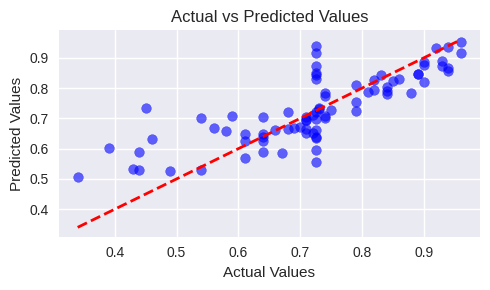

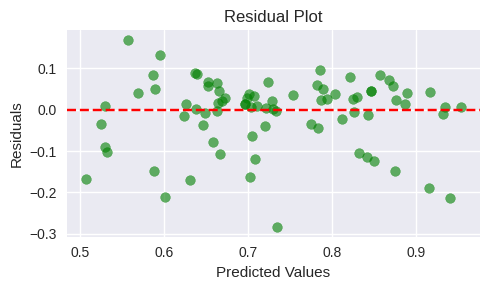

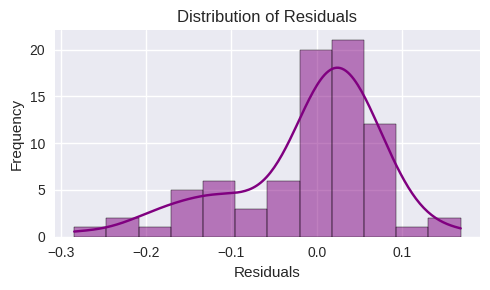


Model Interpretation:
1. R-squared of 63.51% indicates the model explains 63.51% of variance
2. CGPA has the strongest positive impact on admission chances
3. Research experience significantly increases admission probability
4. All features show positive correlation with admission chances
5. The model has relatively low error metrics, indicating good predictive power


In [ ]:
# ---------------- Evaluation Metrics ----------------

# Calculate Mean Squared Error (MSE)
# Measures average squared difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
# Square root of MSE, gives error in same units as target
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
# Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Print model evaluation metrics
print("Model Performance Evaluation:")
print("=" * 40)
print(f"R-squared Score: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ---------------- Actual vs Predicted Plot ----------------

# Plot actual vs predicted values
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# ---------------- Residual Plot ----------------

# Calculate residuals (difference between actual and predicted)
residuals = y_test - y_pred

# Plot residuals to check for patterns (should be randomly scattered if model is good)
plt.figure(figsize=(5,3))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# ---------------- Residual Distribution ----------------

# Plot histogram of residuals to check normality
plt.figure(figsize=(5,3))
sns.histplot(residuals, kde=True, color='purple')  # KDE shows smooth distribution
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# ---------------- Model Interpretation ----------------

print("\nModel Interpretation:")
print("=" * 40)
print("1. R-squared of {:.2f}% indicates the model explains {:.2f}% of variance".format(r_squared*100, r_squared*100))
print("2. CGPA has the strongest positive impact on admission chances")
print("3. Research experience significantly increases admission probability")
print("4. All features show positive correlation with admission chances")
print("5. The model has relatively low error metrics, indicating good predictive power")
